# Regression Exercises

## Linear

In [10]:
# Loading data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]

Here we'll build off of the tutorial exercise, first finding the best linear fit for floor area (sqft) vs valued price (USD). Recall that setting the derivative = 0 and solving for 𝑏 & 𝑚 produces formula for the best fit trend:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

In [11]:
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
    ## YOUR CODE HERE
    #solving for m
    xMean = np.mean(xx)
    yMean = np.mean(yy)
    numerator = sum((xx - xMean) * (yy - yMean))
    denominator = sum((xx - xMean)**2)
    m = float(numerator) / float(denominator)

    b = yMean - m * xMean

    return (m, b)

In [12]:
# Use your function to show the best fit values for our data
(mm,bb) = find_best_fit(x_sqft, y_value)
fit_str = 'y = {aa:.1f}x + {bb:.1f}'
print(fit_str.format(aa=mm,bb=bb))

y = 134.5x + 71270.5


Now we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since its just an equation, we need to *sample* the curve in order to plot it. To do this, we'll find the difference between the largest and smallest floor area, and divide it into 100 sample points.

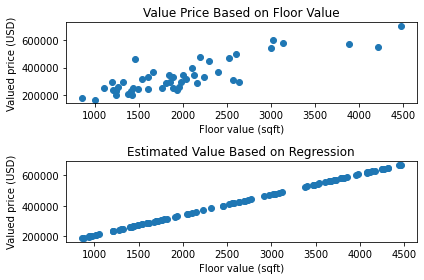

In [13]:
import random

# Plot the data
plt.subplot(2,1,1)
plt.scatter(x_sqft, y_value)
plt.xlabel("Floor value (sqft)")
plt.ylabel("Valued price (USD)")
plt.title("Value Price Based on Floor Value")
# Sample the range from minimum to maximum sqft to get 100 points
minSqft = min(x_sqft)
maxSqft = max(x_sqft)
randomSample = list(random.sample(range(int(minSqft), int(maxSqft)), 100))

def estimateVal(sqft):
  return 134.5 * sqft + 71270.5

sampleValues = []
for i in range(len(randomSample)):
  sampleValues.append(estimateVal(randomSample[i]))

# Apply the best fit equation to each sample point and plot the result
plt.subplot(2,1,2)
plt.scatter(randomSample, sampleValues)
plt.xlabel("Floor value (sqft)")
plt.ylabel("Valued price (USD)")
plt.title("Estimated Value Based on Regression")

plt.tight_layout()
plt.show()

1: Given these parameters, how much should a house with 1600 sqft cost?

(YOUR ANSWER HERE)

In [14]:
print(estimateVal(1600))

286470.5


2: From the dataset, how much did a house with 1600 sqft actually cost?

(YOUR ANSWER HERE)

In [15]:
print(y_value[np.where(x_sqft == 1600)])

[329900.]


3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

(YOUR ANSWER HERE)

In [16]:
loss = (y_value[np.where(x_sqft == 1600)] - estimateVal(1600))[0]
print("We would have lost $%s\nThis relates to %s%%" % (loss, '{0:.2f}'.format(100 *loss / (y_value[np.where(x_sqft == 1600)])[0])))

We would have lost $43429.5
This relates to 13.16%


Now compare the values for 𝑚 and 𝑏 that sklearn generated in the tutorial notebook with the values that you found just now with your function. Hopefully they match.

In [17]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729
My function: 134.52528772024135 71270.49244872906


---
Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [18]:
import sklearn.linear_model as lm

## YOUR CODE HERE
model = lm.LinearRegression()
rooms = data_array[:, 1].reshape(-1, 1)
sqft = x_sqft.reshape(-1, 1)
roomAndSqft = np.concatenate((sqft, rooms), axis = 1)
roomAndSize = model.fit(roomAndSqft, y_value)

print(roomAndSize.score(roomAndSqft, y_value))

0.7329450180289143


Do 2 variables have to be verry correlated to reduce their effectiveness together?

(YOUR ANSWER HERE)

I think that 2 variables need not be very closely correlated to reduce their effectiveness. For example, if there were two variables that both affected the output variable, but where independent of one another, and one had more "influence" -- so to speak -- on the output, I think the effectiveness of having both would be reduced.

For a more concrete example, we can consider the housing problem. One factor can be size, and the other factor can be location. As size increases, the price will increase (generally) regardless of location, but location (I think) affects price much more drastically than size. Like an aparment in San Francisco can cost as much as a mansion in Iowa.

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistical Regression! We are going to use sklearn's breast cancer dataset! It is up to you to decide what features to get the best results!

In [46]:
from sklearn.datasets import load_breast_cancer #datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

data = load_breast_cancer()

X_cols = "-area"
Y_col = "target"

## YOUR CODE HERE
x = data.data
y = data.target

#print(data)

test_size = 0.15
X_train, X_val, y_train, y_val = train_test_split(x, data[Y_col], test_size = test_size, random_state = 1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Test your logistical regression! You must get an accuracy of > 80%

In [47]:
from sklearn.metrics import accuracy_score

## YOUR CODE HERE
y_val_pred=logreg.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Validation Accuracy is  94.18604651162791
